<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/udemy/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

## k-means

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [25]:
# データ読み込み
df = sns.load_dataset('iris')

X = df.drop(columns=['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# 標準化
X_scaled = StandardScaler().fit_transform(X)

In [27]:
# k-means学習
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [28]:
# k-means予測
labels = kmeans.predict(X_scaled)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## k-meansの結果を描画

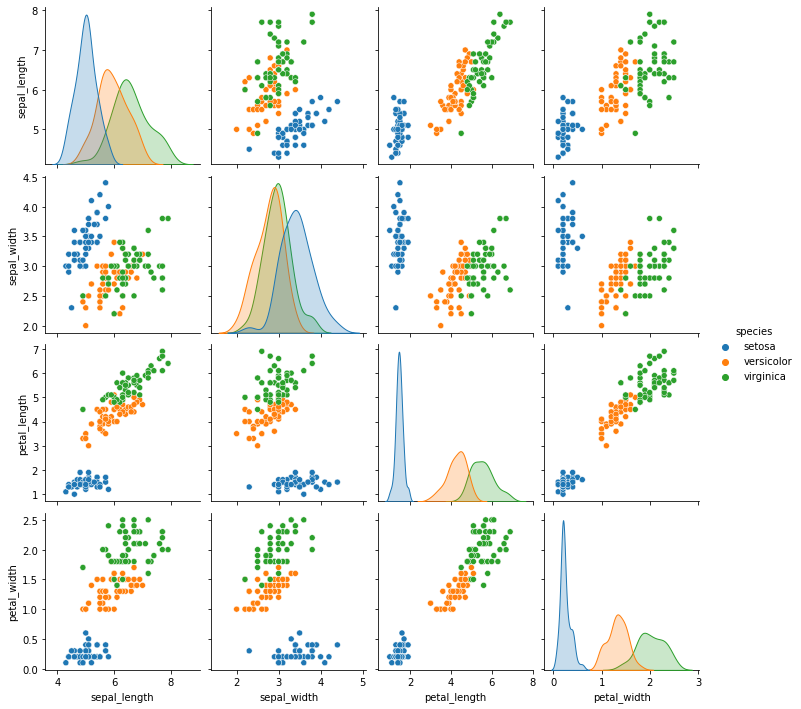

In [29]:
# データセットの散布図
sns.pairplot(df, hue='species')

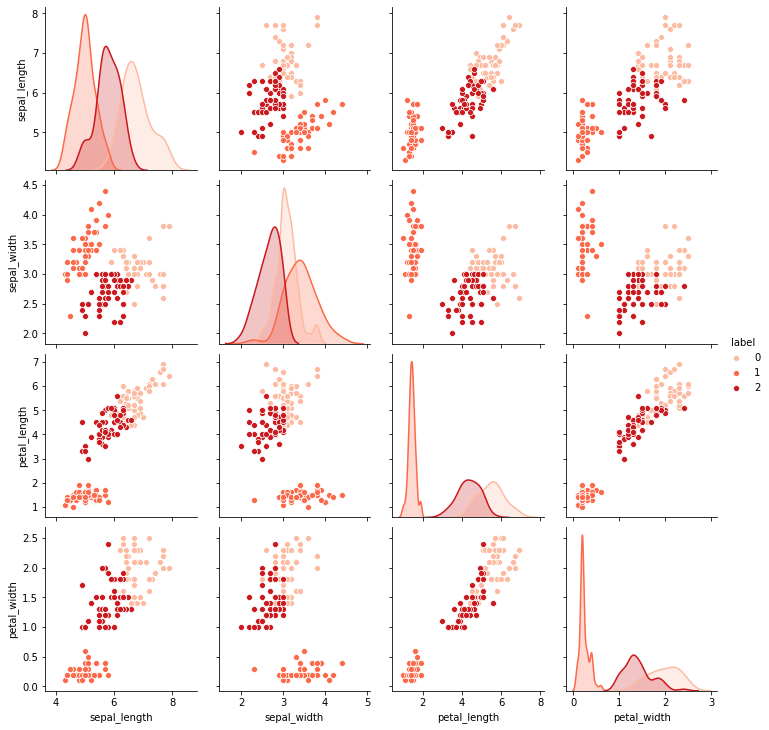

In [10]:
# クラスタリング結果の散布図
df_kmeans = X.copy()
df_kmeans['label'] = labels
sns.pairplot(df_kmeans, hue='label', palette='Reds')

## 損失関数

In [43]:
# K=1~9で損失関数計算
k_list = range(1, 10)
losses = []
for K in k_list:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X_scaled)
    losses.append(np.abs(kmeans.score(X_scaled)))

Text(0.5, 1.0, 'K vs Loss')

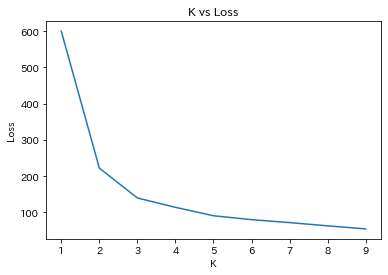

In [44]:
plt.plot(K_list,losses)
# ラベル定義
plt.xlabel('K')
plt.ylabel('Loss')
# タイトル
plt.title('K vs Loss')